# Monitoreo del entrenamiento en tiempo real

Vamos a trabajar con el ultimo modelo de main project pero esta vez vamos a generalizar la creacion del modelo mediante una funcion para no tener que configurar cada modelo nuevo.

### Cargar datos con Keras Generator

In [1]:
# librerias
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf

from tensorflow.keras import regularizers

# libreria para trabajar con las bases de datos 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-11-05 10:08:18.551293: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 10:08:18.843038: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 10:08:19.132547: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730819299.322900   10517 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730819299.365650   10517 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 10:08:19.905690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


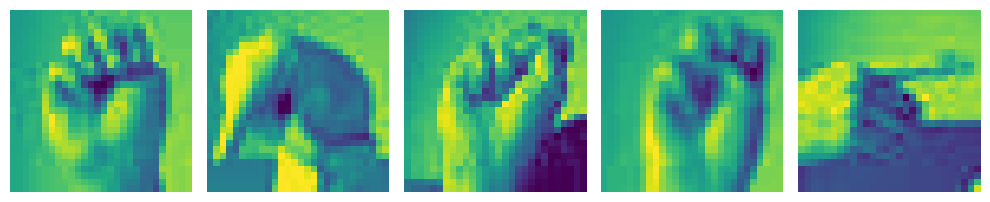

In [2]:
# ruta de los archivos
train_dir = './sign-language-img/Train'
test_dir = './sign-language-img/Test'

# data generator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# generator para test, training y validation
# para datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

# para daros de validacion
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

# para daros de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# clases
classes = [char for char in string.ascii_uppercase if char != 'J' if char != 'Z']

# funcion para mostrar las imagenes
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()

    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# mostrar 5 imagenes
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

### Instanciacion y creacion del Modelo

In [3]:
# funcion para generalizar la creacion del modelo
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(75, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

Definiremos una instancia de modelo, la resumiremos y compilaremos.

In [4]:
model_early = get_model()
model_early.summary()

2024-11-05 10:16:39.872585: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# compilar el modelo
model_early.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
    )

### Callback con Early Stopping

Crearemos nuestro callback de early stopping, para esto usaremos la respectiva clase de Keras que recibirá 3 parámetros: 

- El monitor (que será la variable que vamos a monitorear o vigilar, en este caso será la pérdida).

- La paciencia (que será la tolerancia que tendrá el modelo antes de que pare, si en 3 épocas la pérdida no baja entonces se terminará el entrenamiento) 

- El modo (que determinará si buscamos la reducción o el aumento de la métrica, en este caso lo dejamos en detección automática).

In [6]:
callback_early = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=3,
    mode='auto'
)

### Entrenamiento del modelo

Lo inyectamos al entrenamiento en la sección de callbacks y esperamos el entrenamiento.

In [7]:
history_early = model_early.fit(
    train_generator, 
    epochs=20, 
    callbacks=[callback_early], 
    validation_data=validation_generator
)

/home/jbernal/anaconda3/envs/tf_cpu/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2024-11-05 10:26:17.624939: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.
2024-11-05 10:26:17.690467: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.
2024-11-05 10:26:17.698522: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.
2024-11-05 10:26:17.727440: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.
2024-11-05 10:26:17.751556: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12979200 exceeds 10% of free system memory.


215/215 ━━━━━━━━━━━━━━━━━━━━ 95s 403ms/step - accuracy: 0.2947 - loss: 2.4159 - val_accuracy: 0.7277 - val_loss: 0.7985
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 63s 294ms/step - accuracy: 0.8722 - loss: 0.4228 - val_accuracy: 0.7972 - val_loss: 0.6121
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 54s 251ms/step - accuracy: 0.9690 - loss: 0.1453 - val_accuracy: 0.8253 - val_loss: 0.6258
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 47s 220ms/step - accuracy: 0.9863 - loss: 0.0796 - val_accuracy: 0.8309 - val_loss: 0.6070
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 49s 229ms/step - accuracy: 0.9930 - loss: 0.0554 - val_accuracy: 0.8653 - val_loss: 0.5849
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 48s 222ms/step - accuracy: 0.9955 - loss: 0.0456 - val_accuracy: 0.8568 - val_loss: 0.5801
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 47s 220ms/step - accuracy: 0.9967 - loss: 0.0401 - val_accuracy: 0.8512 - val_loss: 0.6420
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 48s 221ms/step - accuracy: 0.9971 - loss: 0.0374 - val